# Regression Case Study



### Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 


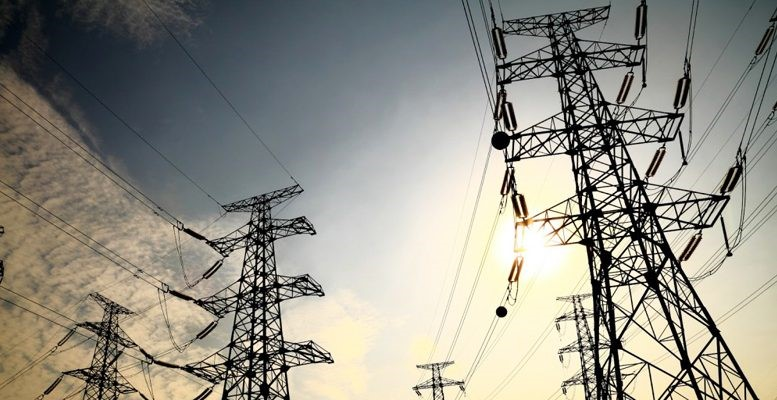

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [2]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np #for basic data manipulation
import pandas as pd
import matplotlib.pyplot as plt  #for visualization.
import seaborn as sns  # for visualization.
%matplotlib inline

import warnings
warnings.filterwarnings('ignore') # to silence unnecessary warnings
# Libraries for data preparation and model building


# Setting global constants to ensure notebook results are reproducible

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [3]:
#Loading the df_train and df_test data
df_train= pd.read_csv("df_train.csv")
df_test= pd.read_csv("df_test.csv")


In [4]:
df_train.head(2)

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667


In [5]:
df_test.head(2)

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.0,71.333333,20.0,3.000000,...,287.816667,280.816667,287.356667,276.150000,280.38,286.816667,285.15,283.15,279.866667,279.15
1,8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.0,78.000000,0.0,3.666667,...,284.816667,280.483333,284.190000,277.816667,281.01,283.483333,284.15,281.15,279.193333,278.15


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


### We would start the EDA process by checking the shape and other basic information about the datasets.

In [6]:
#Check the shape of the data
print('Shape of train data - ', df_train.shape)
print('Shape of test data - ', df_test.shape)

Shape of train data -  (8763, 49)
Shape of test data -  (2920, 48)


In [7]:
# list the columns in the datasets
print('df_train columns:')
df_train.columns

df_train columns:


Index(['Unnamed: 0', 'time', 'Madrid_wind_speed', 'Valencia_wind_deg',
       'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity',
       'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed',
       'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed',
       'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed',
       'Barcelona_rain_1h', 'Seville_pressure', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Sev

#### Next, we check the statistics for the train dataset

In [8]:
## check df_train information (checking for null and datatypes of each column/feature)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

### OBSERVATION

* The df_train datastet comprises of 49 columns and 8763 rows of data collected across five cities in spain. The dataset has both numerical and categorical features.
* We can also note that  3 features (time, Seville_pressure, Valencia_wind_deg) are not in the acceptable datatype for building a model i.e numeric data type. We would have to correct this either by dropping the columns or converting the datatype. 

In [12]:
#View 10 random samples of the columns with object datatype
df_train[[x for x in df_train.columns if df_train[x].dtype == 'object']].sample(10)

,time,Valencia_wind_deg,Seville_pressure
8324,2017-11-07 03:00:00,level_10,sp15
2935,2016-01-03 12:00:00,level_8,sp17
3373,2016-02-27 06:00:00,level_8,sp1
4137,2016-06-01 18:00:00,level_3,sp6
3829,2016-04-24 06:00:00,level_9,sp8
3841,2016-04-25 18:00:00,level_4,sp4
5463,2016-11-14 12:00:00,level_6,sp18
5570,2016-11-27 21:00:00,level_10,sp1
5388,2016-11-05 03:00:00,level_10,sp6
6555,2017-03-31 00:00:00,level_7,sp19


### OBSERVATION
* The first column is the 'time' column. For this column, we have decided to change it to datetime datatype so that we can extract the year, month, day and time column from it (which we do in the Data Cleaning section) as the month of the year and time of the day would be useful in determining the weather condition at a given time.
* The next column is the 'Valencia_wind_deg' column. From observation, we see that the column is a categorical column, classifying into differents ranks. there are digits attached to the text, which we would extract and then change the data type. This also applies to the 'Seville_pressure' column.

### Let's convert this columns to acceptable datatype

In [13]:
#convert object data type to acceptable data type for train
df_train['time'] = pd.to_datetime(df_train['time']) #convert to datetime
df_train['Valencia_wind_deg'] = df_train.Valencia_wind_deg.astype(str).str.extract('(\d+)')# first, extract the numbers only
df_train['Seville_pressure'] = df_train.Seville_pressure.astype(str).str.extract('(\d+)')#first, extract the numbers only
df_train['Seville_pressure'] = pd.to_numeric(df_train['Seville_pressure']) # then convert to numeric data-type
df_train['Valencia_wind_deg'] = pd.to_numeric(df_train['Valencia_wind_deg']) # then convert to numeric data-type

#convert those object columns to accepted datatype for test
df_test['time'] = pd.to_datetime(df_test['time']) #convert to datetime
df_test['Valencia_wind_deg'] = df_test.Valencia_wind_deg.astype(str).str.extract('(\d+)')# first, extract the numbers only
df_test['Seville_pressure'] = df_test.Seville_pressure.astype(str).str.extract('(\d+)')#first, extract the numbers only
df_test['Seville_pressure'] = pd.to_numeric(df_test['Seville_pressure']) # then convert to numeric data-type
df_test['Valencia_wind_deg'] = pd.to_numeric(df_test['Valencia_wind_deg']) # then convert to numeric data-type


df_train.info()#confirm that the columns are now in the correct data-type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            8763 non-null   int64         
 1   time                  8763 non-null   datetime64[ns]
 2   Madrid_wind_speed     8763 non-null   float64       
 3   Valencia_wind_deg     8763 non-null   int64         
 4   Bilbao_rain_1h        8763 non-null   float64       
 5   Valencia_wind_speed   8763 non-null   float64       
 6   Seville_humidity      8763 non-null   float64       
 7   Madrid_humidity       8763 non-null   float64       
 8   Bilbao_clouds_all     8763 non-null   float64       
 9   Bilbao_wind_speed     8763 non-null   float64       
 10  Seville_clouds_all    8763 non-null   float64       
 11  Bilbao_wind_deg       8763 non-null   float64       
 12  Barcelona_wind_speed  8763 non-null   float64       
 13  Barcelona_wind_deg

### Next, we check for null values

In [14]:
#checking for null values
df_train.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

### OBSERVATION
* All the features of the df_train dataset have no null value except for the 'Valencia_pressure' column which has 2068 null values. that is approximately 24% of the column. we would note this down to work on it during our preprocessing.

Next, we check for duplicates

In [15]:
#checking for duplicate entries using the time column seeing that the time column is expected to be unique
df_train.duplicated(subset =['time']).any().sum()

0

In [16]:
# check the summary metrics of our dataset
df_train.describe()

,Unnamed: 0,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,4381.000000,2.425729,5.276389,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,2529.804538,1.850371,2.877642,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,1.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2190.500000,1.000000,3.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,4381.000000,2.000000,5.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,6571.500000,3.333333,8.000000,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,8762.000000,13.000000,10.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


There are 5 cities represented in the dataset (Valencia, Barcelona, Madrid, Bilbao and Seville). Next, we divide the features, group them by cities do a deep dive into each of the cities. We check the following;
* The summary statistics for each of them for any notable trends
* The distribution of each of the columns
* The correlation of each of the features with the target feature and with themselves

In [17]:
#Divide the feature columns based on cities and include the target for variable for each city
a = df_train.columns.tolist()
valencia = [i for i in a if i.startswith('Val')]
barcelona = [i for i in a if i.startswith('Bar')]
madrid = [i for i in a if i.startswith('Mad')] 
bilbao = [i for i in a if i.startswith('Bil')] 
seville = [i for i in a if i.startswith('Sev')] 

### VALENCIA

In [18]:
### valencia summary
df_train[valencia].describe()

,Valencia_wind_deg,Valencia_wind_speed,Valencia_snow_3h,Valencia_pressure,Valencia_temp_max,Valencia_temp,Valencia_humidity,Valencia_temp_min
count,8763.000000,8763.000000,8763.000000,6695.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,5.276389,2.586272,0.000205,1012.051407,291.337233,290.592152,65.247727,289.867648
std,2.877642,2.411190,0.011866,9.506214,7.565692,7.162274,19.262322,6.907402
min,1.000000,0.000000,0.000000,972.666667,269.888000,269.888000,10.333333,269.888000
25%,3.000000,1.000000,0.000000,1010.333333,285.550167,285.150000,51.333333,284.783333
50%,5.000000,1.666667,0.000000,1015.000000,291.037000,290.176667,67.000000,289.550000
75%,8.000000,3.666667,0.000000,1018.000000,297.248333,296.056667,81.333333,294.820000
max,10.000000,52.000000,0.791667,1021.666667,314.263333,310.426667,100.000000,310.272000


array([[<AxesSubplot:title={'center':'Valencia_humidity'}>,
        <AxesSubplot:title={'center':'Valencia_pressure'}>,
        <AxesSubplot:title={'center':'Valencia_snow_3h'}>],
       [<AxesSubplot:title={'center':'Valencia_temp'}>,
        <AxesSubplot:title={'center':'Valencia_temp_max'}>,
        <AxesSubplot:title={'center':'Valencia_temp_min'}>],
       [<AxesSubplot:title={'center':'Valencia_wind_deg'}>,
        <AxesSubplot:title={'center':'Valencia_wind_speed'}>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

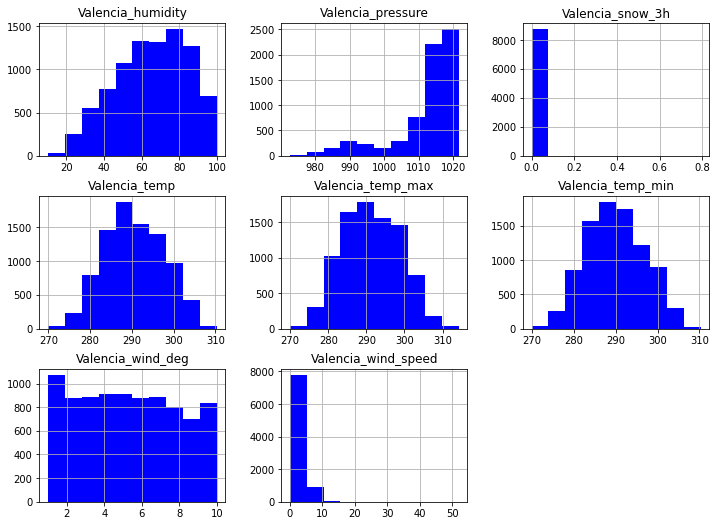

In [19]:
#graphical representation of the distribution
df_train[valencia].hist(layout = (4,3), figsize=(12, 12), color='blue') #graphical representation of its distribution

<AxesSubplot:>

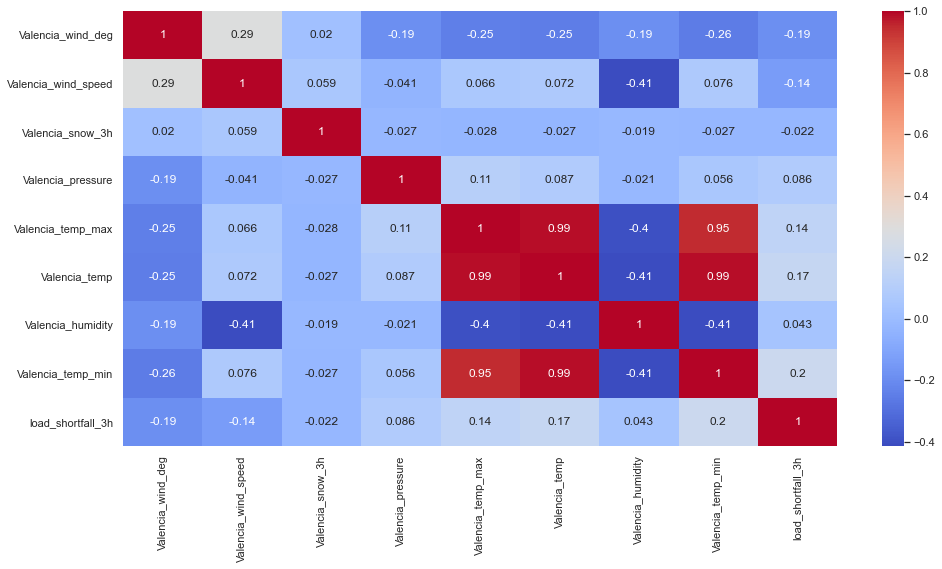

In [20]:
# evaluate the correlation of the features of the city of Valencia with the target variable and with themselves
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(df_train[valencia + ['load_shortfall_3h']].corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

### BARCELONA

In [21]:
#Barcelona summary
df_train[barcelona].describe()

,Barcelona_wind_speed,Barcelona_wind_deg,Barcelona_rain_1h,Barcelona_pressure,Barcelona_rain_3h,Barcelona_weather_id,Barcelona_temp_max,Barcelona_temp,Barcelona_temp_min
count,8763.000000,8763.000000,8763.000000,8.763000e+03,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,2.870497,190.544848,0.128906,1.377965e+03,0.000439,765.979687,291.157644,289.855459,288.447422
std,1.792197,89.077337,0.634730,1.407314e+04,0.003994,88.142235,7.273538,6.528111,6.102593
min,0.000000,0.000000,0.000000,6.706667e+02,0.000000,200.666667,272.150000,270.816667,269.483333
25%,1.666667,118.166667,0.000000,1.014000e+03,0.000000,800.000000,285.483333,284.973443,284.150000
50%,2.666667,200.000000,0.000000,1.018000e+03,0.000000,800.333333,290.150000,289.416667,288.150000
75%,4.000000,260.000000,0.000000,1.022000e+03,0.000000,801.000000,296.855000,294.909000,292.966667
max,12.666667,360.000000,12.000000,1.001411e+06,0.093000,804.000000,314.076667,307.316667,304.816667


array([[<AxesSubplot:title={'center':'Barcelona_pressure'}>,
        <AxesSubplot:title={'center':'Barcelona_rain_1h'}>,
        <AxesSubplot:title={'center':'Barcelona_rain_3h'}>],
       [<AxesSubplot:title={'center':'Barcelona_temp'}>,
        <AxesSubplot:title={'center':'Barcelona_temp_max'}>,
        <AxesSubplot:title={'center':'Barcelona_temp_min'}>],
       [<AxesSubplot:title={'center':'Barcelona_weather_id'}>,
        <AxesSubplot:title={'center':'Barcelona_wind_deg'}>,
        <AxesSubplot:title={'center':'Barcelona_wind_speed'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

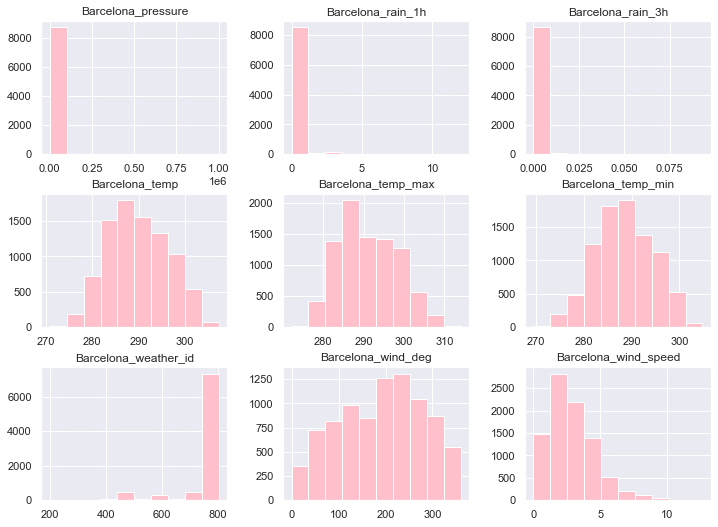

In [22]:
#graphical representation of the distribution
df_train[barcelona].hist(layout = (4,3), figsize=(12, 12), color= 'pink') 

<AxesSubplot:>

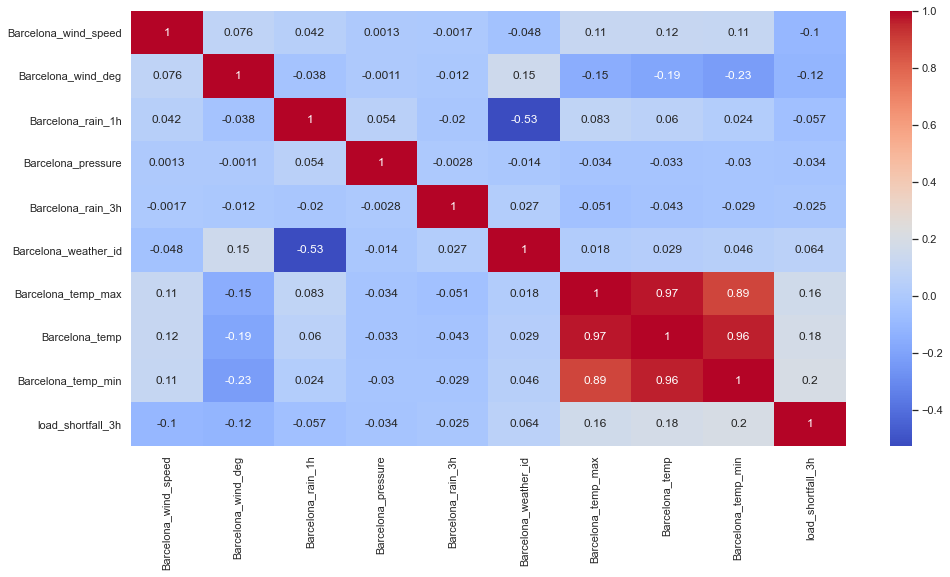

In [23]:
# evaluate the correlation of the features of the city of Barcelona with the target variable and with themselves
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(df_train[barcelona + ['load_shortfall_3h']].corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

### MADRID

In [24]:
#Madrid summary statistics
df_train[madrid].describe()

,Madrid_wind_speed,Madrid_humidity,Madrid_clouds_all,Madrid_rain_1h,Madrid_weather_id,Madrid_pressure,Madrid_temp_max,Madrid_temp,Madrid_temp_min
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,2.425729,57.414717,19.473392,0.037818,773.527594,1010.316920,289.540309,288.419439,287.202203
std,1.850371,24.335396,28.053660,0.152639,77.313315,22.198555,9.752047,9.346796,9.206237
min,0.000000,6.333333,0.000000,0.000000,211.000000,927.666667,264.983333,264.983333,264.983333
25%,1.000000,36.333333,0.000000,0.000000,800.000000,1012.333333,282.150000,281.404281,280.299167
50%,2.000000,58.000000,0.000000,0.000000,800.000000,1017.333333,288.116177,287.053333,286.083333
75%,3.333333,78.666667,33.333333,0.000000,800.666667,1022.000000,296.816667,295.154667,293.884500
max,13.000000,100.000000,100.000000,3.000000,804.000000,1038.000000,314.483333,313.133333,310.383333


array([[<AxesSubplot:title={'center':'Madrid_clouds_all'}>,
        <AxesSubplot:title={'center':'Madrid_humidity'}>,
        <AxesSubplot:title={'center':'Madrid_pressure'}>],
       [<AxesSubplot:title={'center':'Madrid_rain_1h'}>,
        <AxesSubplot:title={'center':'Madrid_temp'}>,
        <AxesSubplot:title={'center':'Madrid_temp_max'}>],
       [<AxesSubplot:title={'center':'Madrid_temp_min'}>,
        <AxesSubplot:title={'center':'Madrid_weather_id'}>,
        <AxesSubplot:title={'center':'Madrid_wind_speed'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

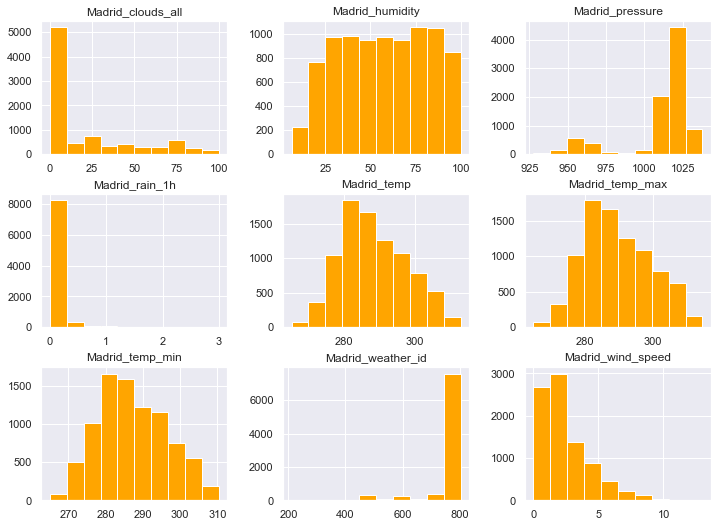

In [25]:
#graphical representation of the distribution
df_train[madrid].hist(layout = (4,3), figsize=(12, 12), color='orange') 

<AxesSubplot:>

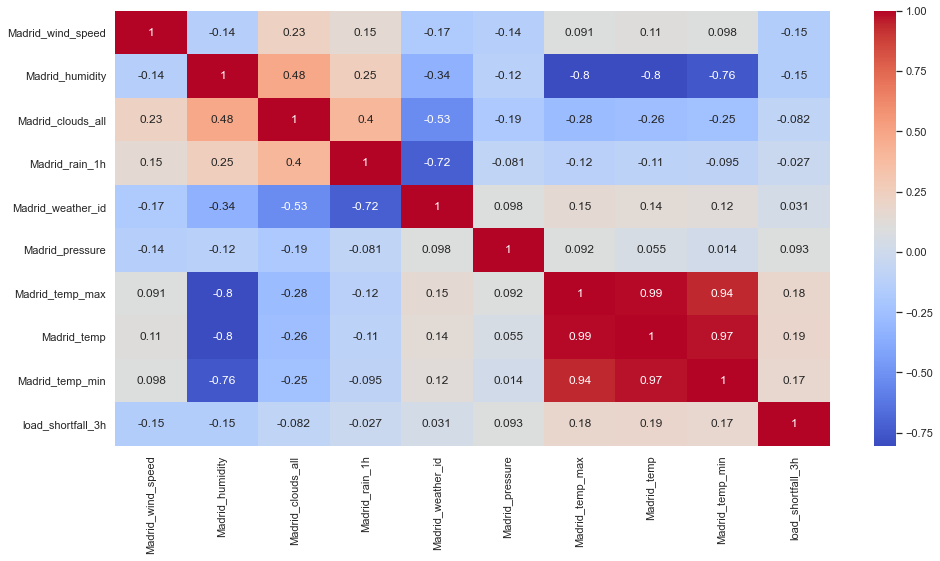

In [26]:
# evaluate the correlation of the features of the city of Madrid with the target variable and with themselves
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(df_train[madrid + ['load_shortfall_3h']].corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

### BILBAO

In [27]:
#Bilbao summary statistics
df_train[bilbao].describe()

,Bilbao_rain_1h,Bilbao_clouds_all,Bilbao_wind_speed,Bilbao_wind_deg,Bilbao_snow_3h,Bilbao_pressure,Bilbao_weather_id,Bilbao_temp_min,Bilbao_temp,Bilbao_temp_max
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,0.135753,43.469132,1.850356,158.957511,0.031912,1017.739549,724.722362,285.017973,286.422929,287.966027
std,0.374901,32.551044,1.695888,102.056299,0.557264,10.046124,115.846537,6.705672,6.818682,7.105590
min,0.000000,0.000000,0.000000,0.000000,0.000000,971.333333,207.333333,264.483333,267.483333,269.063000
25%,0.000000,10.000000,0.666667,73.333333,0.000000,1013.000000,700.333333,280.085167,281.374167,282.836776
50%,0.000000,45.000000,1.000000,147.000000,0.000000,1019.000000,800.000000,284.816667,286.158333,287.630000
75%,0.100000,75.000000,2.666667,234.000000,0.000000,1024.000000,801.666667,289.816667,291.034167,292.483333
max,3.000000,100.000000,12.666667,359.333333,21.300000,1042.000000,804.000000,309.816667,310.710000,317.966667


array([[<AxesSubplot:title={'center':'Bilbao_clouds_all'}>,
        <AxesSubplot:title={'center':'Bilbao_pressure'}>,
        <AxesSubplot:title={'center':'Bilbao_rain_1h'}>],
       [<AxesSubplot:title={'center':'Bilbao_snow_3h'}>,
        <AxesSubplot:title={'center':'Bilbao_temp'}>,
        <AxesSubplot:title={'center':'Bilbao_temp_max'}>],
       [<AxesSubplot:title={'center':'Bilbao_temp_min'}>,
        <AxesSubplot:title={'center':'Bilbao_weather_id'}>,
        <AxesSubplot:title={'center':'Bilbao_wind_deg'}>],
       [<AxesSubplot:title={'center':'Bilbao_wind_speed'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

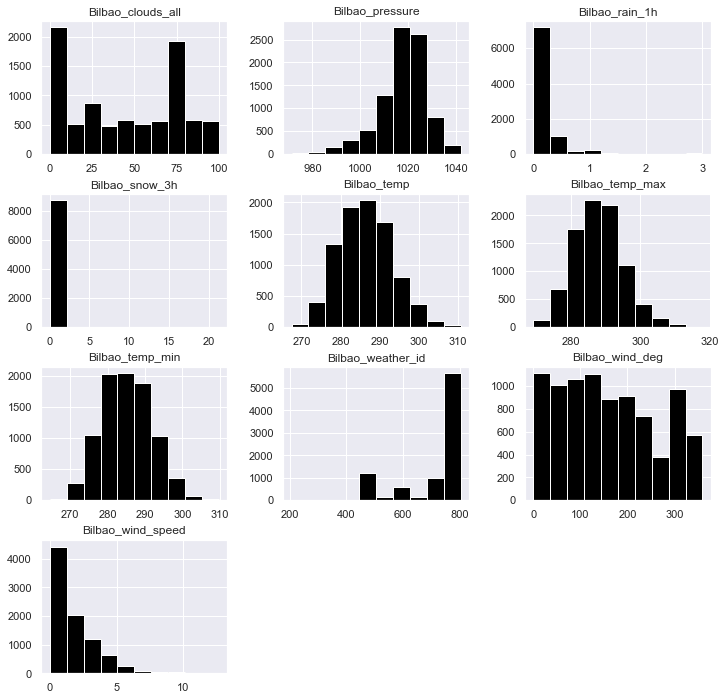

In [28]:
#graphical representation of the distribution
df_train[bilbao].hist(layout = (4,3), figsize=(12, 12), color= 'black') 

<AxesSubplot:>

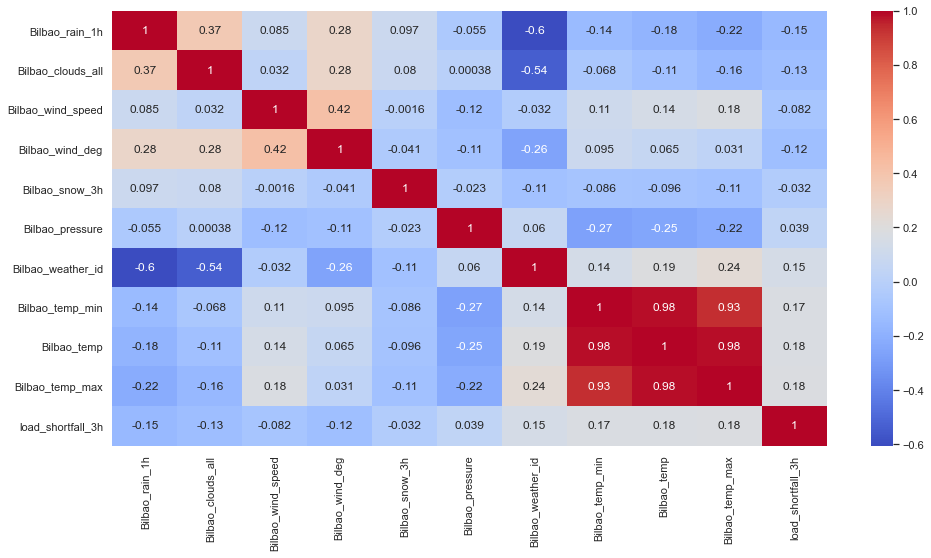

In [29]:
# evaluate the correlation of the features of the city of Bilbao with the target variable and with themselves
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(df_train[bilbao + ['load_shortfall_3h']].corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

### SEVILLE

In [30]:
#Seville summary statistics
df_train[seville].describe()

,Seville_humidity,Seville_clouds_all,Seville_wind_speed,Seville_pressure,Seville_rain_1h,Seville_rain_3h,Seville_weather_id,Seville_temp_max,Seville_temp,Seville_temp_min
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,62.658793,13.714748,2.425045,13.507246,0.039439,0.000243,774.658818,297.479527,293.978903,291.633356
std,22.621226,24.272482,1.672895,7.237267,0.175857,0.003660,71.940009,8.875812,7.920986,8.178220
min,8.333333,0.000000,0.000000,1.000000,0.000000,0.000000,200.000000,272.063000,272.063000,270.150000
25%,44.333333,0.000000,1.000000,7.000000,0.000000,0.000000,800.000000,291.312750,288.282917,285.816667
50%,65.666667,0.000000,2.000000,14.000000,0.000000,0.000000,800.000000,297.101667,293.323333,290.816667
75%,82.000000,20.000000,3.333333,20.000000,0.000000,0.000000,800.000000,304.150000,299.620333,297.150000
max,100.000000,97.333333,11.666667,25.000000,3.000000,0.093333,804.000000,320.483333,314.976667,314.816667


array([[<AxesSubplot:title={'center':'Seville_clouds_all'}>,
        <AxesSubplot:title={'center':'Seville_humidity'}>,
        <AxesSubplot:title={'center':'Seville_pressure'}>],
       [<AxesSubplot:title={'center':'Seville_rain_1h'}>,
        <AxesSubplot:title={'center':'Seville_rain_3h'}>,
        <AxesSubplot:title={'center':'Seville_temp'}>],
       [<AxesSubplot:title={'center':'Seville_temp_max'}>,
        <AxesSubplot:title={'center':'Seville_temp_min'}>,
        <AxesSubplot:title={'center':'Seville_weather_id'}>],
       [<AxesSubplot:title={'center':'Seville_wind_speed'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

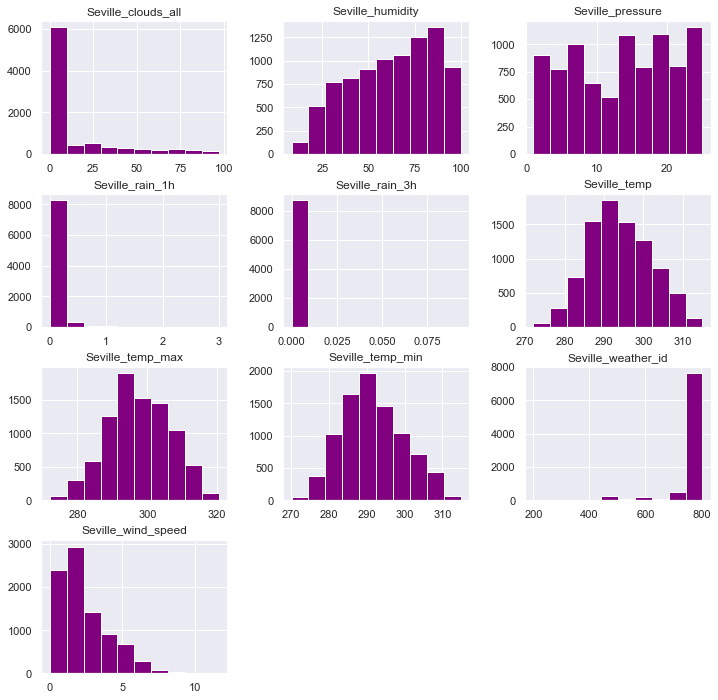

In [31]:
#graphical representation of the distribution 
df_train[seville].hist(layout = (4,3), figsize=(12, 12), color= 'purple') 

<AxesSubplot:>

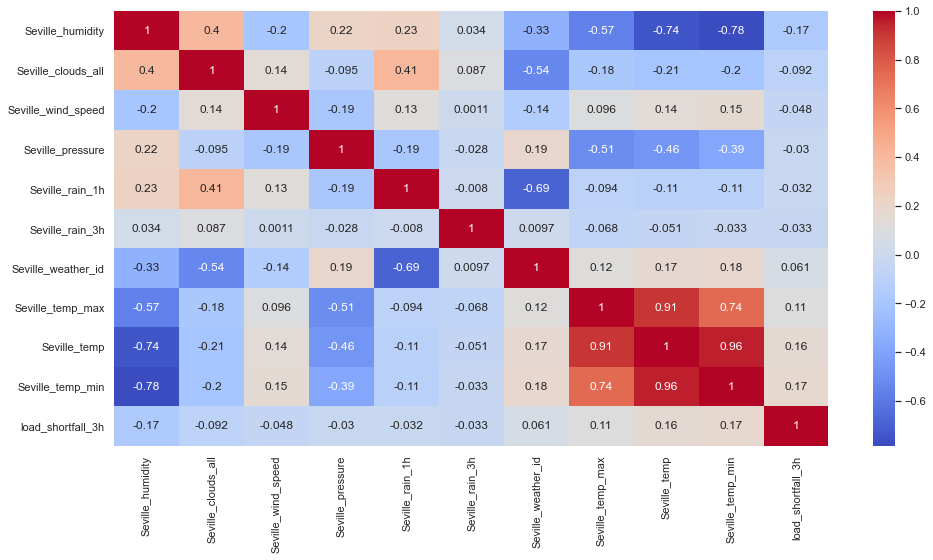

In [32]:
# evaluate the correlation of the features of the city of Seville with the target variable and with themselves
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(df_train[seville + ['load_shortfall_3h']].corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

### OBSERVATION
* All the columns have relatively low correlation with our target variable. As such, there would be need to engineer some new columns that may have a positive effect on our target variable
* The average, minimum and maximum temperatures all have similar values and are highly collinear. To avoid multicollinearity, we would be removing the minimum and maximum temperatures and leaving just the average temperatures.
* We also noticed from the distributions that some of the features are highly skewed. We would take a deeper look into these features to check for possible outliers

Next, we take a closer look at our target variable

In [33]:
#checking the summary metrics for 
df_train['load_shortfall_3h'].describe() 

count     8763.000000
mean     10673.857612
std       5218.046404
min      -6618.000000
25%       7390.333333
50%      11114.666667
75%      14498.166667
max      31904.000000
Name: load_shortfall_3h, dtype: float64

<AxesSubplot:ylabel='Frequency'>

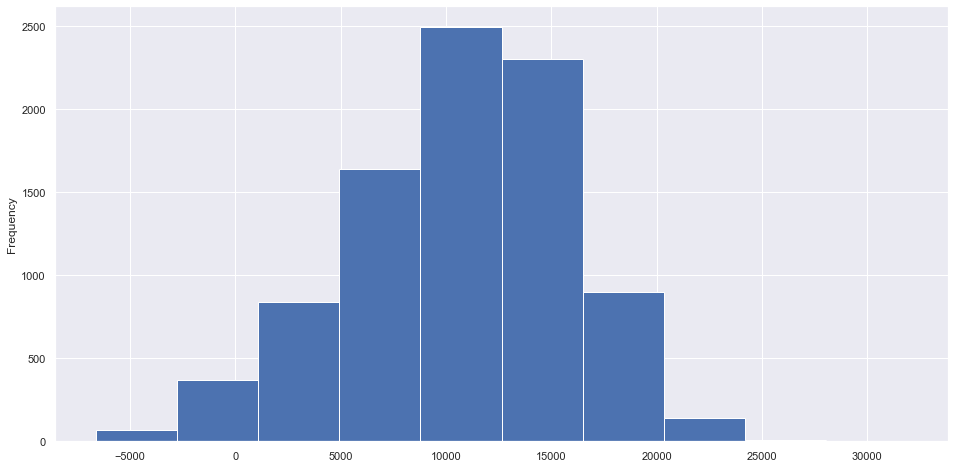

In [34]:
df_train['load_shortfall_3h'].plot(kind='hist') #checking the distribution of the data

In [35]:
#Get the observations and features where the load_shortfall_3h is less thab zero(0) i.e, it's in negative
df_negative = df_train[df_train['load_shortfall_3h'] < 0]

df_negative.describe().T #checking the summary metric

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,317.0,3741.227129,2245.816489,8.000000,2597.000000,3741.000000,5109.000000,8761.000000
Madrid_wind_speed,317.0,3.434280,2.416461,0.000000,1.333333,2.666667,5.000000,10.666667
Valencia_wind_deg,317.0,6.523659,2.713697,1.000000,5.000000,7.000000,9.000000,10.000000
Bilbao_rain_1h,317.0,0.221767,0.450175,0.000000,0.000000,0.000000,0.300000,3.000000
Valencia_wind_speed,317.0,3.843323,3.361430,0.000000,1.333333,2.666667,5.333333,22.000000
Seville_humidity,317.0,70.748686,20.684972,8.333333,57.000000,75.666667,87.000000,100.000000
Madrid_humidity,317.0,64.426919,21.434918,10.000000,51.666667,66.333333,82.333333,100.000000
Bilbao_clouds_all,317.0,53.859096,29.739914,0.000000,30.000000,63.333333,75.000000,94.666667
Bilbao_wind_speed,317.0,2.499474,2.219436,0.000000,1.000000,1.666667,3.666667,12.000000
Seville_clouds_all,317.0,20.955836,29.837926,0.000000,0.000000,0.000000,33.333333,92.000000


In [36]:
#Get the observations and features where the load_shortfall_3h is more than zero(0) i.e, it's in positive
df_positive = df_train[df_train['load_shortfall_3h'] > 0]

df_positive.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,8446.0,4405.012314,2536.823948,0.000000,2186.250000,4448.500000,6609.750000,8.762000e+03
Madrid_wind_speed,8446.0,2.387876,1.815016,0.000000,1.000000,1.666667,3.333333,1.300000e+01
Valencia_wind_deg,8446.0,5.229576,2.873242,1.000000,3.000000,5.000000,8.000000,1.000000e+01
Bilbao_rain_1h,8446.0,0.132524,0.371423,0.000000,0.000000,0.000000,0.100000,3.000000e+00
Valencia_wind_speed,8446.0,2.539091,2.355362,0.000000,1.000000,1.666667,3.666667,5.200000e+01
Seville_humidity,8446.0,62.355158,22.635574,9.333333,44.000000,65.333333,82.000000,1.000000e+02
Madrid_humidity,8446.0,57.151531,24.399470,6.333333,36.000000,57.333333,78.333333,1.000000e+02
Bilbao_clouds_all,8446.0,43.079170,32.589016,0.000000,9.333333,43.666667,75.000000,1.000000e+02
Bilbao_wind_speed,8446.0,1.825993,1.668311,0.000000,0.666667,1.000000,2.666667,1.266667e+01
Seville_clouds_all,8446.0,13.442971,23.998178,0.000000,0.000000,0.000000,20.000000,9.733333e+01


### OBSERVATION
* Comparing the features in positive and the negative load_shortfall tables,  We observed that there is no significant difference between the features when the load shortfall is negative and when it is positive.
* We can observe that some of the features are highly skewed. This can sometimes be the result of outliers in the dataset. We can take a look at this using the skew and kurtosis method of pandas DataFrame.



In [37]:
#Create a skew dataframe showing skew and kurtosis for each column
skew_df = pd.DataFrame(df_train.skew(), columns=['Skew'])
kurtosis_df = pd.DataFrame(df_train.kurtosis(), columns=['Kurtosis'])

In [38]:
#concatenate the skew and kutosis df so we can see the values side by side
new_df = pd.concat([skew_df, kurtosis_df], axis=1).sort_values('Kurtosis', ascending = False)
new_df

,Skew,Kurtosis
Valencia_snow_3h,63.298084,4089.323165
Barcelona_pressure,57.979664,3687.564230
Bilbao_snow_3h,26.177568,806.128471
Seville_rain_3h,19.342574,413.136592
Barcelona_rain_3h,12.696605,187.800460
Barcelona_rain_1h,8.726988,101.578931
Seville_rain_1h,8.067341,93.840746
Madrid_rain_1h,7.074308,76.584491
Valencia_wind_speed,3.499637,35.645426
Bilbao_rain_1h,5.222802,32.904656


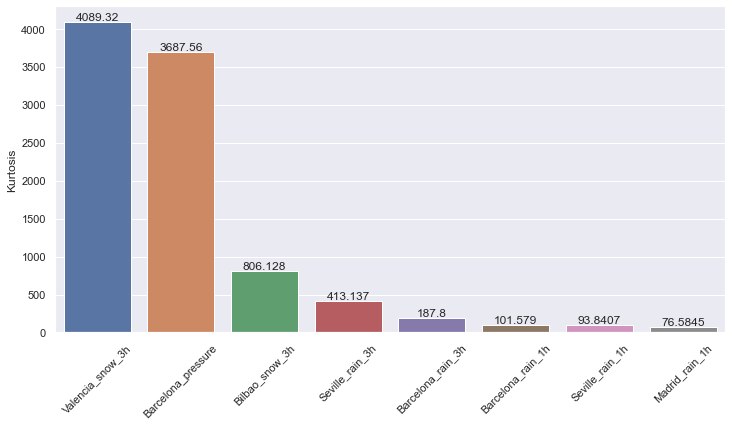

In [102]:
#Visualize fearures with high Kurtosis
a = new_df[new_df['Kurtosis']>70]
fig = plt.figure(figsize = (12,6))
ax = sns.barplot(x = a.index, y='Kurtosis',data=a)
ax.bar_label(ax.containers[0])
labels = plt.xticks(rotation=45)

Valencia_snow_3h            AxesSubplot(0.125,0.71587;0.168478x0.16413)
Barcelona_pressure       AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Bilbao_snow_3h           AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Seville_rain_3h          AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Barcelona_rain_3h          AxesSubplot(0.125,0.518913;0.168478x0.16413)
Barcelona_rain_1h       AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Seville_rain_1h         AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Madrid_rain_1h          AxesSubplot(0.731522,0.518913;0.168478x0.16413)
Valencia_wind_speed        AxesSubplot(0.125,0.321957;0.168478x0.16413)
Bilbao_rain_1h          AxesSubplot(0.327174,0.321957;0.168478x0.16413)
Seville_weather_id      AxesSubplot(0.529348,0.321957;0.168478x0.16413)
Madrid_weather_id       AxesSubplot(0.731522,0.321957;0.168478x0.16413)
Barcelona_weather_id          AxesSubplot(0.125,0.125;0.168478x0.16413)
Bilbao_wind_speed          AxesSubplot(0.327174,0.125;0.168478x0

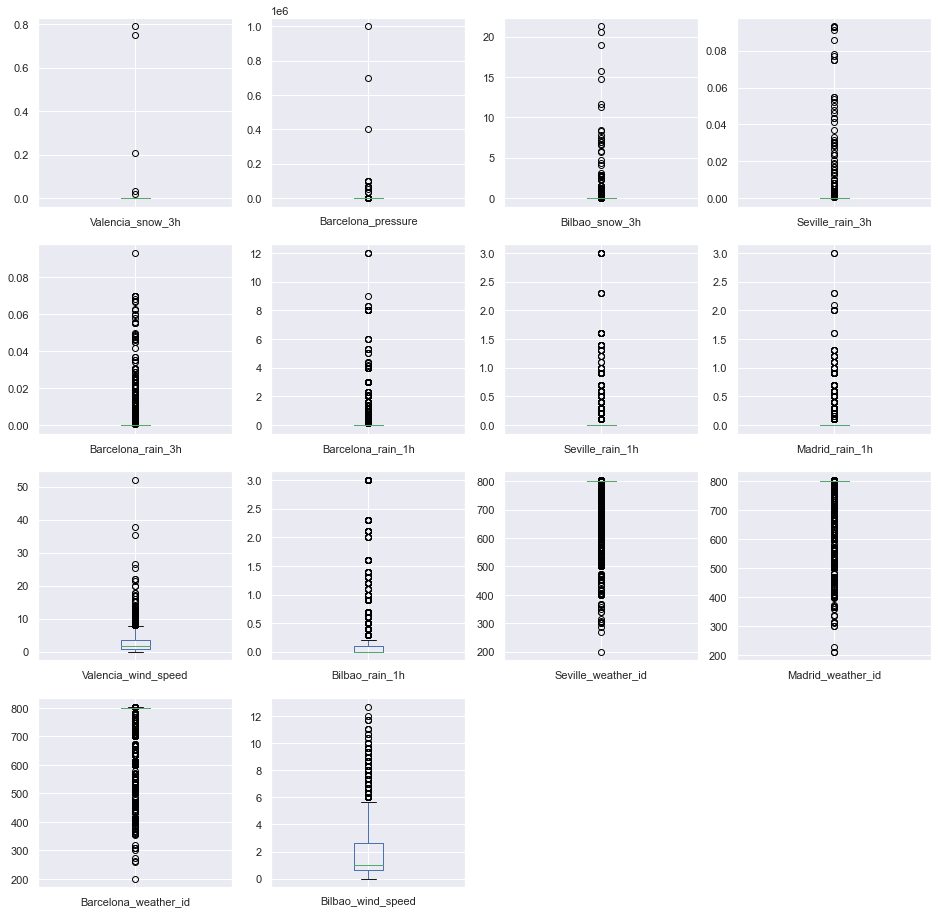

In [39]:
#boxplot
new_lst = new_df.loc[new_df['Kurtosis']>3].index.tolist()#Extract a list of all the features with high kurtosis(>3)
df_train[new_lst].plot(kind='box', subplots=True, layout=(4, 4), sharex=False, figsize=(16, 16))#plot a boxplot to check for outliers
 

### OBSERVATION

The features that are highly skewed and have these outliers are seasonal features like Snow and rainfall. It is only expected to snow in a particular time of the year and at other time, the value is zero which is responsible for the distribution.
Due to this, we have decided to leave the dataset as is

### Next up, we take a look at the test data

In [40]:
 ## check df_test shape
df_test.shape

(2920, 48)

In [41]:
 ## check df_test-+ information (checking for null and datatypes of each column/feature)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            2920 non-null   int64         
 1   time                  2920 non-null   datetime64[ns]
 2   Madrid_wind_speed     2920 non-null   float64       
 3   Valencia_wind_deg     2920 non-null   int64         
 4   Bilbao_rain_1h        2920 non-null   float64       
 5   Valencia_wind_speed   2920 non-null   float64       
 6   Seville_humidity      2920 non-null   float64       
 7   Madrid_humidity       2920 non-null   float64       
 8   Bilbao_clouds_all     2920 non-null   float64       
 9   Bilbao_wind_speed     2920 non-null   float64       
 10  Seville_clouds_all    2920 non-null   float64       
 11  Bilbao_wind_deg       2920 non-null   float64       
 12  Barcelona_wind_speed  2920 non-null   float64       
 13  Barcelona_wind_deg

### OBSERVATION
We can see that we have 48 columns similar to those in the df_train dataset, with the exception ot the 'load_shortfall_3h' column. This is expected as the 'load_shortfall_3h'  is our target variable(i.e, the column we want to predict). it also has 2920 rows.  We also see that  some features are also in the object datatype just like the df_train dataset.  We'd apply the same cleaning process we applied to the df-train dataset

In [42]:
#check for null value
df_test.isnull().sum()

Unnamed: 0                0
time                      0
Madrid_wind_speed         0
Valencia_wind_deg         0
Bilbao_rain_1h            0
Valencia_wind_speed       0
Seville_humidity          0
Madrid_humidity           0
Bilbao_clouds_all         0
Bilbao_wind_speed         0
Seville_clouds_all        0
Bilbao_wind_deg           0
Barcelona_wind_speed      0
Barcelona_wind_deg        0
Madrid_clouds_all         0
Seville_wind_speed        0
Barcelona_rain_1h         0
Seville_pressure          0
Seville_rain_1h           0
Bilbao_snow_3h            0
Barcelona_pressure        0
Seville_rain_3h           0
Madrid_rain_1h            0
Barcelona_rain_3h         0
Valencia_snow_3h          0
Madrid_weather_id         0
Barcelona_weather_id      0
Bilbao_pressure           0
Seville_weather_id        0
Valencia_pressure       454
Seville_temp_max          0
Madrid_pressure           0
Valencia_temp_max         0
Valencia_temp             0
Bilbao_weather_id         0
Seville_temp        

##### Just like the df_train dataset, only the 'Valencia_pressure' column has null values.

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

## DATA PRE-PROCESSING / CLEANING

In this section, We would create a function that can be applied to both the train and test data and clean the columns that need to be cleaned.

Firstly we would be handling the missing data in the 'Valencia_pressure' column. We have replaced the null values in the column with the mode.

Next, we engineer some new features from the 'time' column. We extract the year, month, day, hour and weekday from the column.


Based on our EDA, we made some observations:
1. The "unnamed 0" (has all unique values) and 'weather_id' columns (has values for different weather conditions of the city) are identifiers and as such, we would be dropping them from our datasets.
2. Some of the features are highly correlated with each other. We would also be dropping them to avoid multicolinearity.
3. The problem statement requires us to predict based on a 3-hour time period and as such we would also be dropping the "_1h" features.
4. We would also be dropping the 'time' column as most models don't work with time series

In [43]:
def clean_data(df):
    # replace null values in valencia pressure with mode
    df['Valencia_pressure'] = df['Valencia_pressure'].fillna(df['Valencia_pressure'].mode()[0])
    
    #create new features from time column
    df.loc[:, 'year'] = df['time'].dt.year
    df.loc[:, 'month'] = df['time'].dt.month
    df.loc[:, 'day'] = df['time'].dt.day
    df.loc[:, 'hour'] = df['time'].dt.hour
    df.loc[:, 'weekday'] = df['time'].dt.weekday
    
    # Remove unwanted columns
    identifiers= ['Unnamed: 0', 'Barcelona_weather_id', 'Madrid_weather_id', 'Seville_weather_id','Bilbao_weather_id']
    multicol_features =['Madrid_temp_min','Seville_temp_min','Barcelona_temp_min', 'Bilbao_temp_min', 'Valencia_temp_min', 
                   'Bilbao_temp_max', 'Madrid_temp_max','Barcelona_temp_max', 'Valencia_temp_max', 'Seville_temp_max',
                   'Seville_clouds_all','Bilbao_clouds_all', 'Madrid_clouds_all']
    one_hourly = ['Bilbao_rain_1h', 'Seville_rain_1h','Madrid_rain_1h','Barcelona_rain_1h', 'time']
    df = df.drop(identifiers+multicol_features+one_hourly, axis =1)
    
    return df

In [44]:
#Apply the data cleaning function to the test and train data
df_train_clean = clean_data(df_train)
df_test_clean = clean_data(df_test)

In [45]:
df_test_clean.shape

(2920, 30)

### FEATURE SELECTION

Feature Selection is one of the core aspects of a machine learning process. The features you train your model with, have hugh significance on the performance of your model.
There is always the issue of knowing which feature to use and which ones are irrelevant or less important in terms of contributing to the prediction of the target variable. Fewer attributes are always preferred as it reduces noise and the complexity of the model.

There are several feature selection techniques. For our project, we have decided to use the Step Forward Selection Method.

This method is an iterative method which involves starting with no feature in the model. In each iteration, a new feature which best improves the model till a newly added feature no longer improves the model.

In [46]:
#Declare features and target variables
X = df_train_clean.drop('load_shortfall_3h',axis=1)
y = df_train_clean['load_shortfall_3h']

In [48]:
#import packages for the selection of features
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.tree import DecisionTreeRegressor


dt = DecisionTreeRegressor()
#Build SFFS - step forward feature selection
sfs1 = sfs(dt, k_features = 20, forward = True, floating = False, scoring = 'r2', verbose = 2, cv = 5)

#perform SFFS
sfs1 = sfs1.fit(X, y)

feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.5s finished

[2022-05-27 11:22:12] Features: 1/20 -- score: 0.036439317855009[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    0.6s finished

[2022-05-27 11:22:13] Features: 2/20 -- score: 0.13588280858788362[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    1.2s finished

[2022-05-27 11:22:14] Features: 3/20 -- score: 0.13586697255767644[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 

[0, 1, 4, 5, 7, 10, 11, 12, 13, 14, 15, 16, 17, 19, 24, 25, 26, 27, 28, 29]


[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    2.8s finished

[2022-05-27 11:22:50] Features: 20/20 -- score: -0.12897389174668134

In [49]:
#reduce the x column based on selected features
X = X[X.columns[[feat_cols]]]


In [50]:
X.shape

(8763, 20)

## FEATURE SCALING

Feature scaling is a very important stage in Data Preprocessing. It helps to bring down the values of the features in the dataset so that everything is on the same scale. This helps the machine learning algorithm to perform calculations quickly and also eliminates the bias that the machine learning algorithm would have given to features with higher values.

There are 2 main types of feature scaling:
* Normalization
* Standardization

Normalization method scales the value down between zero and one while in Standardization, the mean is equated to zero and the standardard deviation is equated to one.

For our project, we would use the standardization technique because it is more robust to outliers

In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In this section, we would be considering 5 models
  1. Linear Regression
  2. Decision Trees
  3. XGboost
  4. Random Forest
  5. Extra Trees Regressor

In [78]:
# split data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25, random_state = 42)

In [79]:
# create one or more ML models
#linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

rmse_lr = mean_squared_error(y_test, y_pred , squared=False)
r2_lr = r2_score(y_test, y_pred )

print(r2_lr)
rmse_lr

0.14891093988055693


4876.1614442101145

<function matplotlib.pyplot.show(close=None, block=None)>

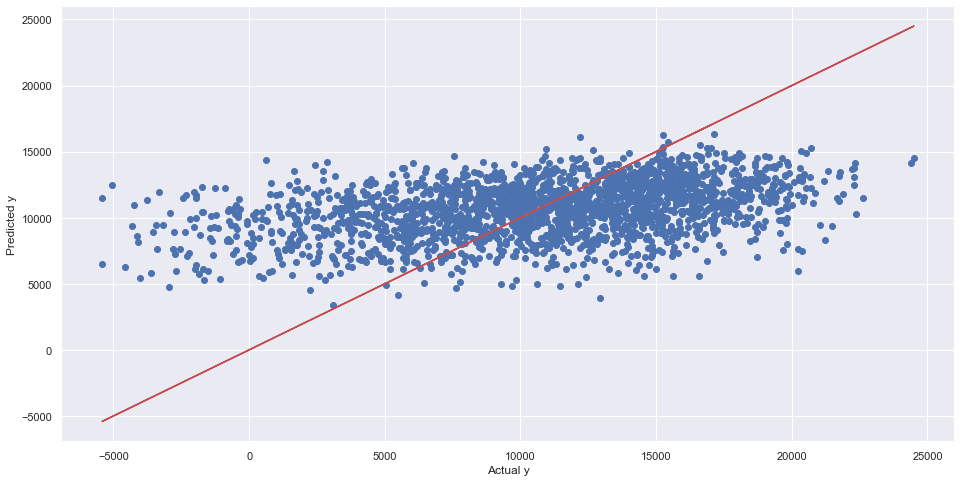

In [80]:
#Visualize results
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, 'r')
plt.ylabel('Predicted y')
plt.xlabel('Actual y')
plt.show

In [81]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

rmse_dt = mean_squared_error(y_test, y_pred , squared=False)
r2_dt = r2_score(y_test, y_pred )

print(r2_dt)
rmse_dt

0.45917267131284856


3887.0478473602066

<function matplotlib.pyplot.show(close=None, block=None)>

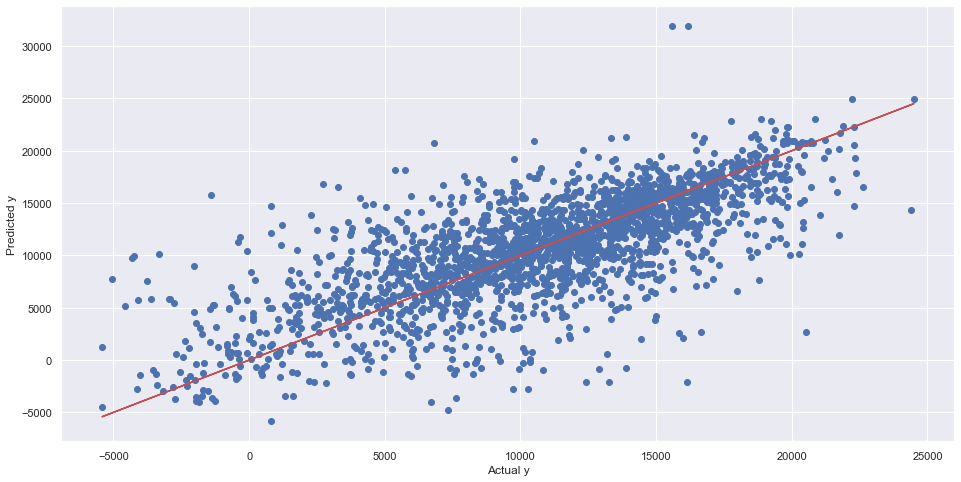

In [82]:
#Visualize results
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, 'r')
plt.ylabel('Predicted y')
plt.xlabel('Actual y')
plt.show

In [83]:
from xgboost.sklearn import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

rmse_xg = mean_squared_error(y_test, y_pred , squared=False)
r2_xg = r2_score(y_test, y_pred )

print(r2_xg)
print(rmse_xg)

0.7644437503684265
2565.298384723775


<function matplotlib.pyplot.show(close=None, block=None)>

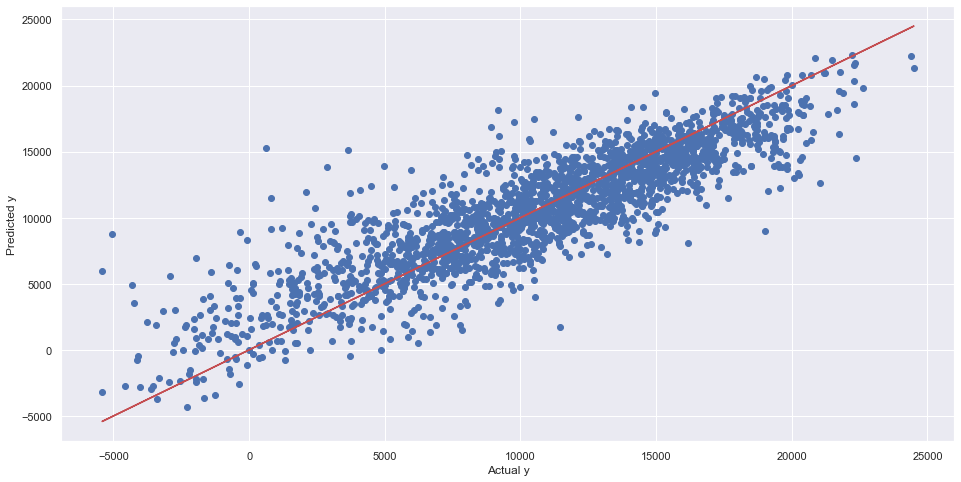

In [84]:
#Visualize results
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, 'r')
plt.ylabel('Predicted y')
plt.xlabel('Actual y')
plt.show

In [85]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

rmse_rf = mean_squared_error(y_test, y_pred , squared=False)
r2_rf = r2_score(y_test, y_pred )

print(r2_rf)
print(rmse_rf)

0.7514752786935945
2634.9681485941037


<function matplotlib.pyplot.show(close=None, block=None)>

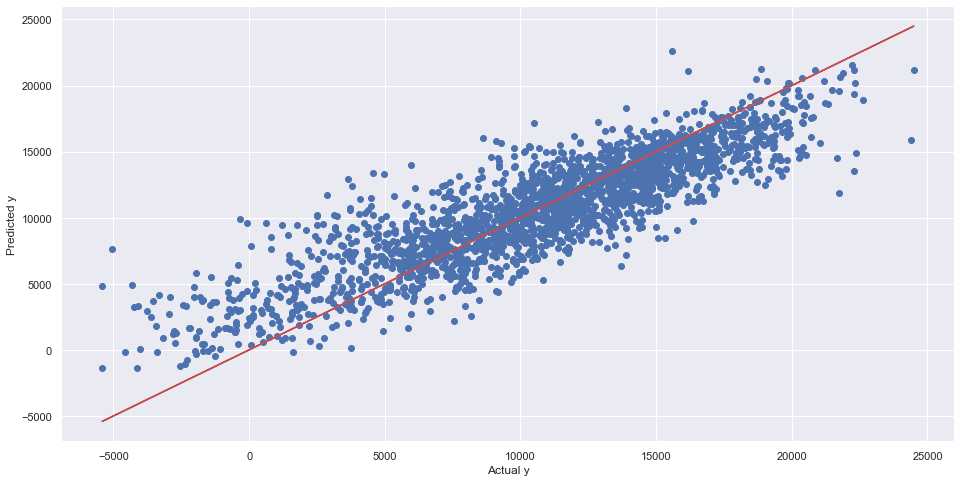

In [86]:
#Visualize results
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, 'r')
plt.ylabel('Predicted y')
plt.xlabel('Actual y')
plt.show

In [87]:
from sklearn.ensemble import ExtraTreesRegressor
et = ExtraTreesRegressor()
et.fit(X_train, y_train)
y_pred = et.predict(X_test)

rmse_et = mean_squared_error(y_test, y_pred , squared=False)
r2_et = r2_score(y_test, y_pred )

print(r2_et)
print(rmse_et)

0.7742250641265279
2511.4725509440887


<function matplotlib.pyplot.show(close=None, block=None)>

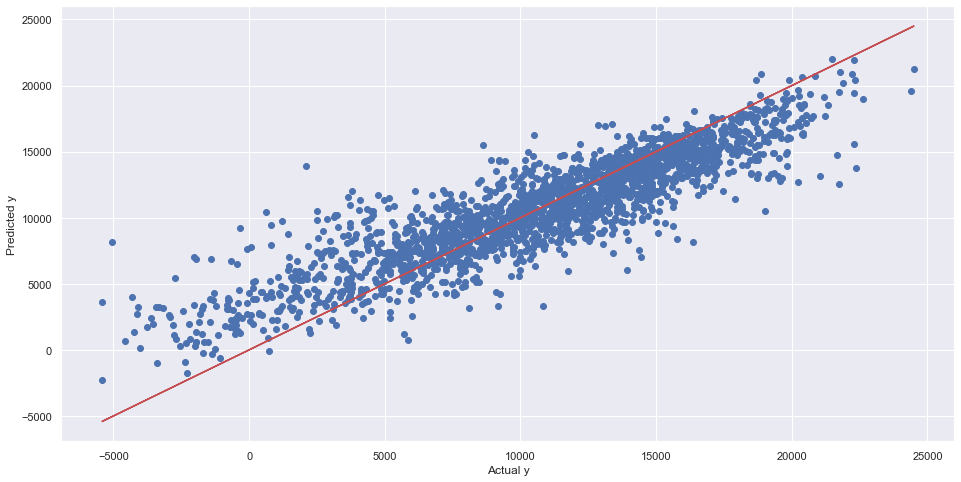

In [88]:
#Visualize results
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, 'r')
plt.ylabel('Predicted y')
plt.xlabel('Actual y')
plt.show

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [89]:
# Compare model performance
model_df = pd.DataFrame({'Linear Regression': [r2_lr, rmse_lr], 'Decision Tree':[r2_dt, rmse_dt], 
                'Random Forest':[r2_rf, rmse_rf], 'XGBoost': [r2_xg, rmse_xg], 'Extra Trees Regressor':[r2_et, rmse_et]}, 
                index =  ['r2_score', 'root mean squared error'])
model_df = model_df.T.sort_values(by='root mean squared error')
model_df

,r2_score,root mean squared error
Extra Trees Regressor,0.774225,2511.472551
XGBoost,0.764444,2565.298385
Random Forest,0.751475,2634.968149
Decision Tree,0.459173,3887.047847
Linear Regression,0.148911,4876.161444


## Improve Model Performance

To improve the performance of our model, we considered 3 options:
1. Calculate and visualize feature importances
2. Hyperparameter tuning
3. Ensembling methods

Elapsed time to compute the importances: 0.046 seconds


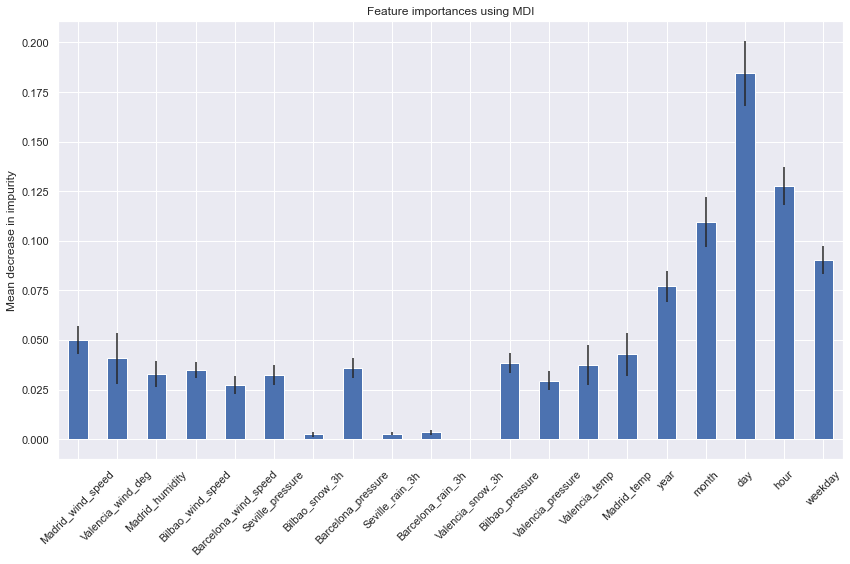

In [91]:
#View feature importances of the best performing model - Extra trees regressor
import time
start_time = time.time()
importances = et.feature_importances_
std = np.std([tree.feature_importances_ for tree in et.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(importances, index=X.columns.tolist())

fig, ax = plt.subplots(figsize = (12,8))
forest_importances.plot.bar(yerr=std, ax=ax,rot=45)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [93]:
#Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100 , stop = 200, num = 20)] # returns 10 numbers 

max_features = ['auto', 'log2']

max_depth = [int(x) for x in np.linspace(5, 10, num = 2)] 

max_depth.append(None)

bootstrap = [True, False]

r_grid = {'n_estimators': n_estimators,

               'max_features': max_features,

               'max_depth': max_depth,

               'bootstrap': bootstrap}

rfr_random = RandomizedSearchCV(estimator=et, param_distributions=r_grid, n_iter = 20, scoring='neg_mean_absolute_error', 
                                cv = 5, verbose=2, random_state=42, n_jobs=-1)

rfr_random.fit(X_train, y_train)
y_pred = rfr_random.predict(X_test)

rmse_rcv = mean_squared_error(y_test, y_pred , squared=False)
r2_rcv = r2_score(y_test, y_pred )

print(r2_rcv)
print(rmse_rcv)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
0.7788239601271965
2485.762379910391


### Ensembling methods


There are different kinds of ensembling models. Based on the types of models we trained, we decided to use one of the Heterogenous methods - Stacking.

In the Stacking method, the output of multiple trained base models (ofen called base learners) are used as features into another machine learning model (called the meta learner or meta model).

Unlike the voting method of heterogenous ensembling, it answers the question of how to determine the optimal voting weights of the base learners

<img src="https://editor.analyticsvidhya.com/uploads/39725Stacking.png" width=65%/>

In [94]:
from sklearn.ensemble import StackingRegressor
models = [("ET", et),("XGB", xgb), ("Random Forest", rf)]
meta_learner_reg = LinearRegression()

s_reg = StackingRegressor(estimators=models, final_estimator=meta_learner_reg)
s_reg.fit(X_train, y_train)
y_pred = s_reg.predict(X_test)

rmse_sreg = mean_squared_error(y_test, y_pred , squared=False)
r2_sreg = r2_score(y_test, y_pred )

print(r2_sreg)
print(rmse_sreg)

0.8109554543479565
2298.1197119240055


## OBSERVATIONS


* The feature importances showed that the we do not have any feature that negatively impacts the model and so we have decided to leave the features as they are
* We also observed that the columns we engineered from the time column had a huge impact in the performance of our model
* The hyperparameter tuning took a really long time to run and the results only had a minute impact on the model
* The stacked model seemed to perform the best with the highest r2 score and lowest error.

In [95]:
# Choose best model and motivate why it is the best choice
#Append new models and evaluate
model_df = model_df.append(pd.Series([r2_rcv, rmse_rcv], index = model_df.columns, name='Tuned Extra Trees' ))
model_df = model_df.append(pd.Series([r2_sreg, rmse_sreg], index = model_df.columns, name='Stacked model' ))
model_df = model_df.sort_values(by='root mean squared error')
model_df

,r2_score,root mean squared error
Stacked model,0.810955,2298.119712
Tuned Extra Trees,0.778824,2485.762380
Extra Trees Regressor,0.774225,2511.472551
XGBoost,0.764444,2565.298385
Random Forest,0.751475,2634.968149
Decision Tree,0.459173,3887.047847
Linear Regression,0.148911,4876.161444


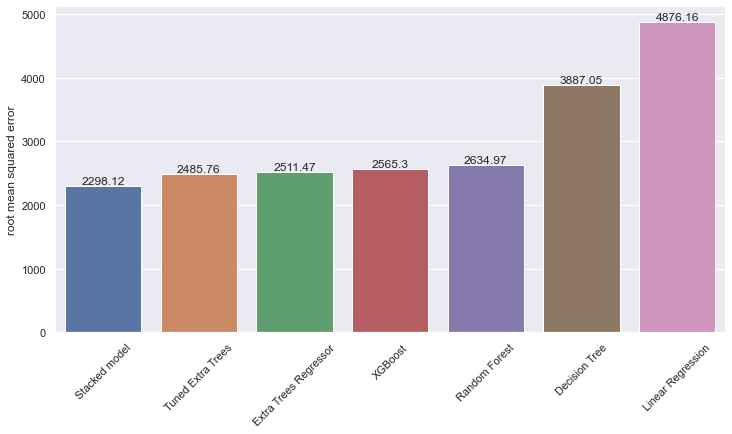

In [96]:
fig = plt.figure(figsize = (12,6))
ax = sns.barplot(x = model_df.index, y='root mean squared error',data=model_df)
ax.bar_label(ax.containers[0])
labels = plt.xticks(rotation=45)

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

The best performing model was obtained by ensembling the Random forest, Extreme gradient boost and Extra trees regressor model together using the stacking method.

Ensembling methods generally increase the robustness of the model and reduces overfitting. They also help to reduce the bias of underfitting.
It does this by helping to reduce the variance from the models that might be very accurate. It reduces noise by utilizing several samples of the data which would contain several attributes(eg mean, median e.t.c)


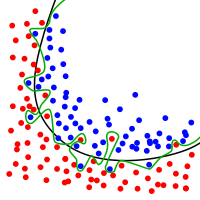

The stacking method is preferred when you have heterogenous base models that have different skills on a dataset. So stacking is best deployed when you have a range of models that make different assumption about how to solve a predictive task.

The meta-model is often simple unlike the base models which could be complex. Linear models are majorly used as the meta-models because they provide a smoot interpretation of the base models. The final prediction is a weighted average (blending) of the individual base models.

The down side of the stacking ensemble model is that it usually very complex and if a base model performs close to the stacking model, it is usually preferred given its simpler nature.

## CONCLUSION AND RECOMMENDATION

To know our Model performed well, we would normalise the RMSE

The Normalized Root Mean Square Error (NRMSE) the comparison between models with different scales. The normalised RMSE (NRMSE) relates the RMSE to the observed range of the variable. Thus, the NRMSE can be interpreted as a fraction of the overall range that is typically resolved by the model.


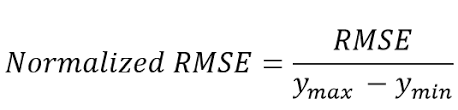

In [105]:
nrmse = np.round(mean_squared_error(y_test, y_pred , squared=False)/(np.max(y) - np.min(y)),2)
nrmse

0.06

A good predictive model should have NRMSE < 0.3

Our NRMSE value is 0.06 which is lower than the threshold of 0.3. This means that our model performed really well with this dataset.


### RECOMENDATION

Our model will peform better if more data information was available. 

Features such as Wind Turbine radius/capacity would have help in calculating the wind power and in turn help us get information on the amount of electricity generated from the wind.

Also, access to electricity generated by fossil fuel would be helpful in comparing the electricity generated by the fossil against the renewable sources which is the aim of this project.

## MODEL EXPORT

In [68]:
#Export model as a ppickle file for model deployment
import pickle
# Pickle model for use within our API
save_path = 'load_shortfall_random_forest_regressor.pkl'
print (f"Training completed. Saving model to: {save_path}")
pickle.dump(rf, open(save_path,'wb'))


Training completed. Saving model to: load_shortfall_stacked.pkl
